First will start by importing the libraries that we need Pandas, Numpy, matplotlib & seaborn

In [2]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import numpy as np
import pandas as pd 
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from datetime import date
%matplotlib inline

Then we need to read our data

In [3]:
df = pd.read_csv("C:\\Users\\mrnaz\\Desktop\\BootCamp\\My_Project\\WN-JAN-2020.csv")

let's have a look at what just we read

In [4]:
df.shape

(109770, 36)

In [5]:
df.head(5)

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_CARRIER_FL_NUM,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,...,CANCELLATION_CODE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1,3,1/1/2020,5888,N951WN,ONT,"Ontario, CA",California,SFO,"San Francisco, CA",...,NaN,95,122.0,74.0,363,8.0,0.0,27.0,0.0,33.0
1,1,3,1/1/2020,6276,N467WN,ONT,"Ontario, CA",California,SFO,"San Francisco, CA",...,NaN,90,92.0,71.0,363,NaN,NaN,NaN,NaN,NaN
2,1,3,1/1/2020,4598,N7885A,ONT,"Ontario, CA",California,SJC,"San Jose, CA",...,NaN,70,68.0,57.0,333,NaN,NaN,NaN,NaN,NaN
3,1,3,1/1/2020,4761,N551WN,ONT,"Ontario, CA",California,SJC,"San Jose, CA",...,NaN,75,75.0,63.0,333,NaN,NaN,NaN,NaN,NaN
4,1,3,1/1/2020,5162,N968WN,ONT,"Ontario, CA",California,SJC,"San Jose, CA",...,NaN,80,67.0,57.0,333,NaN,NaN,NaN,NaN,NaN


First I will rename some columns 

In [6]:
df.rename({'MKT_CARRIER_FL_NUM':'FL_NUM', 
               'ORIGIN_CITY_NAME':'ORIGIN_CITY',
               'ORIGIN_CITY_NAME':'ORIGIN_CITY',
               'ORIGIN_STATE_NM':'ORIGIN_STATE',
               'DEST_CITY_NAME':'DEST_CITY',
              'DAY_OF_MONTH':'MONTH_DAY', 
               'DAY_OF_WEEK':'WEEK_DAY',
               'DEST_STATE_NM':'DEST_STATE'},
              axis=1, inplace=True)

Second I will remove the Time in Hourly Block and the 3 letters city code it is not familiar for most people that are not working in the aviation let's just remove it and save some space

In [7]:
df.drop(['ORIGIN','DEST','DEP_TIME_BLK','ARR_TIME_BLK'],axis=1,inplace=True)

we decided that we will not include canceled flights in our study 
so we will remove the row that have tha value of 1 in the column CANCELLED then we will remove the columns CANCELLED and CANCELLATION_CODE

In [8]:
df = df[df.CANCELLED == 0]

In [9]:
df.drop(['CANCELLED','CANCELLATION_CODE'],axis=1,inplace=True)

let's have a look on the table after we do this changes

In [10]:
df.head(100)# or df.sample(5)

,MONTH_DAY,WEEK_DAY,FL_DATE,FL_NUM,TAIL_NUM,ORIGIN_CITY,ORIGIN_STATE,DEST_CITY,DEST_STATE,CRS_DEP_TIME,...,ARR_DELAY_NEW,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1,3,1/1/2020,5888,N951WN,"Ontario, CA",California,"San Francisco, CA",California,1810,...,68.0,95,122.0,74.0,363,8.0,0.0,27.0,0.0,33.0
1,1,3,1/1/2020,6276,N467WN,"Ontario, CA",California,"San Francisco, CA",California,1150,...,0.0,90,92.0,71.0,363,NaN,NaN,NaN,NaN,NaN
2,1,3,1/1/2020,4598,N7885A,"Ontario, CA",California,"San Jose, CA",California,2020,...,0.0,70,68.0,57.0,333,NaN,NaN,NaN,NaN,NaN
3,1,3,1/1/2020,4761,N551WN,"Ontario, CA",California,"San Jose, CA",California,1340,...,10.0,75,75.0,63.0,333,NaN,NaN,NaN,NaN,NaN
4,1,3,1/1/2020,5162,N968WN,"Ontario, CA",California,"San Jose, CA",California,915,...,0.0,80,67.0,57.0,333,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,3,1/1/2020,3239,N8309C,"Phoenix, AZ",Arizona,"Nashville, TN",Tennessee,700,...,0.0,190,166.0,154.0,1449,NaN,NaN,NaN,NaN,NaN
97,1,3,1/1/2020,3896,N8621A,"Phoenix, AZ",Arizona,"Nashville, TN",Tennessee,935,...,0.0,190,175.0,156.0,1449,NaN,NaN,NaN,NaN,NaN
98,1,3,1/1/2020,4833,N707SA,"Phoenix, AZ",Arizona,"Nashville, TN",Tennessee,1930,...,0.0,190,168.0,154.0,1449,NaN,NaN,NaN,NaN,NaN
99,1,3,1/1/2020,5763,N774SW,"Phoenix, AZ",Arizona,"Nashville, TN",Tennessee,1520,...,0.0,185,172.0,157.0,1449,NaN,NaN,NaN,NaN,NaN


O.K we need to know more about our table such as number of non-null and data type for each column

In [11]:
df.corr()  # View the correlations

,MONTH_DAY,WEEK_DAY,FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,TAXI_OUT,WHEELS_OFF,WHEELS_ON,...,ARR_DELAY_NEW,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
MONTH_DAY,1.000000,-0.048708,-0.146981,-0.002648,-0.007319,-0.069223,-0.059010,0.034801,-0.006397,0.013314,...,-0.056968,-0.007621,-0.021888,-0.024825,-0.015939,0.023220,0.018947,0.017258,-0.018426,0.001895
WEEK_DAY,-0.048708,1.000000,0.398408,0.004037,0.008941,0.078601,0.068550,0.008830,0.008758,0.000322,...,0.064739,0.024424,0.030711,0.028719,0.029239,-0.011529,-0.001369,0.008479,0.015569,0.028032
FL_NUM,-0.146981,0.398408,1.000000,-0.008782,-0.004616,0.046484,0.039345,0.004174,-0.005141,-0.010252,...,0.036302,0.015153,0.019712,0.018090,0.017418,-0.012258,-0.020280,-0.001053,0.011928,0.019426
CRS_DEP_TIME,-0.002648,0.004037,-0.008782,1.000000,0.994650,0.106595,0.106980,-0.107341,0.992802,0.772968,...,0.078027,-0.082036,-0.081613,-0.070213,-0.068282,-0.064064,-0.043834,-0.153495,0.000769,0.143588
DEP_TIME,-0.007319,0.008941,-0.004616,0.994650,1.000000,0.170195,0.169777,-0.103121,0.997372,0.773501,...,0.136258,-0.075473,-0.074904,-0.063881,-0.061814,0.027886,-0.013415,-0.153051,0.002944,0.209636
DEP_DELAY,-0.069223,0.078601,0.046484,0.106595,0.170195,1.000000,0.993329,0.038600,0.165301,0.080156,...,0.930269,0.060622,0.062771,0.059572,0.061599,0.558424,0.164455,-0.048814,0.007443,0.615008
DEP_DELAY_NEW,-0.059010,0.068550,0.039345,0.106980,0.169777,0.993329,1.000000,0.034444,0.164698,0.076225,...,0.942908,0.044740,0.046639,0.043609,0.045281,0.558531,0.164830,-0.044865,0.007273,0.615442
TAXI_OUT,0.034801,0.008830,0.004174,-0.107341,-0.103121,0.038600,0.034444,1.000000,-0.083167,-0.065948,...,0.163794,0.079996,0.165157,0.058554,0.044667,-0.105624,0.035696,0.402928,-0.012294,-0.106225
WHEELS_OFF,-0.006397,0.008758,-0.005141,0.992802,0.997372,0.165301,0.164698,-0.083167,1.000000,0.775350,...,0.133792,-0.074128,-0.071846,-0.062965,-0.061316,0.015079,-0.011454,-0.133158,0.002516,0.186857
WHEELS_ON,0.013314,0.000322,-0.010252,0.772968,0.773501,0.080156,0.076225,-0.065948,0.775350,1.000000,...,0.052708,0.011520,0.014257,0.021420,0.025101,-0.038596,-0.019100,-0.059680,0.014409,0.016670


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107849 entries, 0 to 109769
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MONTH_DAY            107849 non-null  int64  
 1   WEEK_DAY             107849 non-null  int64  
 2   FL_DATE              107849 non-null  object 
 3   FL_NUM               107849 non-null  int64  
 4   TAIL_NUM             107849 non-null  object 
 5   ORIGIN_CITY          107849 non-null  object 
 6   ORIGIN_STATE         107849 non-null  object 
 7   DEST_CITY            107849 non-null  object 
 8   DEST_STATE           107849 non-null  object 
 9   CRS_DEP_TIME         107849 non-null  int64  
 10  DEP_TIME             107849 non-null  float64
 11  DEP_DELAY            107849 non-null  float64
 12  DEP_DELAY_NEW        107849 non-null  float64
 13  TAXI_OUT             107849 non-null  float64
 14  WHEELS_OFF           107849 non-null  float64
 15  WHEELS_ON        

Let's convert the column FL_DATE from object to Date

In [13]:
df["FL_DATE"] = pd.to_datetime(df["FL_DATE"])

In [14]:
df.isna().any()

MONTH_DAY              False
WEEK_DAY               False
FL_DATE                False
FL_NUM                 False
TAIL_NUM               False
ORIGIN_CITY            False
ORIGIN_STATE           False
DEST_CITY              False
DEST_STATE             False
CRS_DEP_TIME           False
DEP_TIME               False
DEP_DELAY              False
DEP_DELAY_NEW          False
TAXI_OUT               False
WHEELS_OFF             False
WHEELS_ON               True
TAXI_IN                 True
CRS_ARR_TIME           False
ARR_TIME                True
ARR_DELAY               True
ARR_DELAY_NEW           True
CRS_ELAPSED_TIME       False
ACTUAL_ELAPSED_TIME     True
AIR_TIME                True
DISTANCE               False
CARRIER_DELAY           True
WEATHER_DELAY           True
NAS_DELAY               True
SECURITY_DELAY          True
LATE_AIRCRAFT_DELAY     True
dtype: bool

we need to know number of NaN in each colomn

In [15]:
df.isna().sum()  # or df.isnull().sum()

MONTH_DAY                  0
WEEK_DAY                   0
FL_DATE                    0
FL_NUM                     0
TAIL_NUM                   0
ORIGIN_CITY                0
ORIGIN_STATE               0
DEST_CITY                  0
DEST_STATE                 0
CRS_DEP_TIME               0
DEP_TIME                   0
DEP_DELAY                  0
DEP_DELAY_NEW              0
TAXI_OUT                   0
WHEELS_OFF                 0
WHEELS_ON                 35
TAXI_IN                   35
CRS_ARR_TIME               0
ARR_TIME                  35
ARR_DELAY                141
ARR_DELAY_NEW            141
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      141
AIR_TIME                 141
DISTANCE                   0
CARRIER_DELAY          97528
WEATHER_DELAY          97528
NAS_DELAY              97528
SECURITY_DELAY         97528
LATE_AIRCRAFT_DELAY    97528
dtype: int64

In the columns CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY and LATE_AIRCRAFT_DELAY
The null means that there is no delay we will just replace the nulls with 0

In [16]:
#replac null with 0
df['CARRIER_DELAY'] = df['CARRIER_DELAY'].fillna(0)
df['WEATHER_DELAY'] = df['WEATHER_DELAY'].fillna(0)
df['NAS_DELAY'] = df['NAS_DELAY'].fillna(0)
df['SECURITY_DELAY'] = df['SECURITY_DELAY'].fillna(0)
df['LATE_AIRCRAFT_DELAY'] = df['LATE_AIRCRAFT_DELAY'].fillna(0)

We found nulls in columns WHEELS_ON, TAXI_IN, ARR_TIME, ACTUAL_ELAPSED_TIME and AIR_TIME

But this columns should not have nulls so we will consider it un complete data and we will exclude it from the study

In [17]:
#remove raw with null 
df = df[df.WHEELS_ON.notnull()]
df = df[df.TAXI_IN.notnull()]
df = df[df.ARR_TIME.notnull()]
df = df[df.ACTUAL_ELAPSED_TIME.notnull()]
df = df[df.AIR_TIME.notnull()]

In [18]:
df.describe() 

,MONTH_DAY,WEEK_DAY,FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,TAXI_OUT,WHEELS_OFF,WHEELS_ON,...,ARR_DELAY_NEW,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,107708.000000,107708.000000,107708.000000,107708.000000,107708.000000,107708.000000,107708.000000,107708.000000,107708.000000,107708.000000,...,107708.000000,107708.000000,107708.000000,107708.000000,107708.000000,107708.000000,107708.000000,107708.000000,107708.000000,107708.000000
mean,15.977875,3.928613,2250.675864,1337.005144,1341.719882,4.321824,6.595341,12.020073,1361.953272,1482.359667,...,5.171037,129.005088,119.095796,102.059011,725.544788,1.744875,0.080347,0.754512,0.009349,1.791009
std,9.031045,1.913497,1707.669940,479.038444,485.280712,21.071903,20.188246,5.975961,483.994386,516.382017,...,18.945691,56.358293,55.411353,54.368042,442.352177,11.435742,3.141456,6.066389,0.630270,12.051683
min,1.000000,1.000000,1.000000,500.000000,1.000000,-20.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,35.000000,27.000000,18.000000,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,2.000000,971.000000,915.000000,920.000000,-4.000000,0.000000,9.000000,932.000000,1059.000000,...,0.000000,85.000000,76.000000,60.000000,371.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,4.000000,1749.000000,1330.000000,1336.000000,-1.000000,0.000000,10.000000,1347.000000,1515.000000,...,0.000000,115.000000,106.000000,89.000000,621.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,24.000000,5.000000,3260.250000,1740.000000,1746.000000,4.000000,4.000000,14.000000,1758.000000,1918.000000,...,0.000000,160.000000,149.000000,131.000000,972.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.000000,7.000000,6860.000000,2335.000000,2359.000000,602.000000,602.000000,115.000000,2400.000000,2400.000000,...,597.000000,385.000000,416.000000,389.000000,2557.000000,422.000000,407.000000,280.000000,117.000000,597.000000


To examine data types and look for cases of missing or potentially wrong data, the describe function helps to get an overview of the data from a statistical summary point of view. This is also useful for spotting any potential errors that may need a closer look.

In [19]:
df.shape

(107708, 30)

There are 109770 records and 36 columns in the dataset.

In [20]:
df.size

3231240

In [21]:
df.columns 

Index(['MONTH_DAY', 'WEEK_DAY', 'FL_DATE', 'FL_NUM', 'TAIL_NUM', 'ORIGIN_CITY',
       'ORIGIN_STATE', 'DEST_CITY', 'DEST_STATE', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY'],
      dtype='object')

In [22]:
df.dtypes # This will peovied data type for each column

MONTH_DAY                       int64
WEEK_DAY                        int64
FL_DATE                datetime64[ns]
FL_NUM                          int64
TAIL_NUM                       object
ORIGIN_CITY                    object
ORIGIN_STATE                   object
DEST_CITY                      object
DEST_STATE                     object
CRS_DEP_TIME                    int64
DEP_TIME                      float64
DEP_DELAY                     float64
DEP_DELAY_NEW                 float64
TAXI_OUT                      float64
WHEELS_OFF                    float64
WHEELS_ON                     float64
TAXI_IN                       float64
CRS_ARR_TIME                    int64
ARR_TIME                      float64
ARR_DELAY                     float64
ARR_DELAY_NEW                 float64
CRS_ELAPSED_TIME                int64
ACTUAL_ELAPSED_TIME           float64
AIR_TIME                      float64
DISTANCE                        int64
CARRIER_DELAY                 float64
WEATHER_DELA

In [23]:
# i need to list all origin city name
print(df.ORIGIN_CITY.unique())

['Ontario, CA' 'Norfolk, VA' 'West Palm Beach/Palm Beach, FL'
 'Portland, OR' 'Philadelphia, PA' 'Phoenix, AZ' 'Pittsburgh, PA'
 'Pensacola, FL' 'Providence, RI' 'Portland, ME' 'Raleigh/Durham, NC'
 'Richmond, VA' 'Reno, NV' 'Rochester, NY' 'Fort Myers, FL'
 'San Diego, CA' 'San Antonio, TX' 'Louisville, KY' 'Seattle, WA'
 'San Francisco, CA' 'San Jose, CA' 'San Juan, PR' 'Salt Lake City, UT'
 'Sacramento, CA' 'Santa Ana, CA' 'St. Louis, MO' 'Tampa, FL' 'Tulsa, OK'
 'Tucson, AZ' 'Albuquerque, NM' 'Albany, NY' 'Amarillo, TX' 'Atlanta, GA'
 'Austin, TX' 'Dallas, TX' 'New Orleans, LA' 'Oakland, CA' 'Kahului, HI'
 'Oklahoma City, OK' 'Omaha, NE' 'Hartford, CT' 'Birmingham, AL'
 'Nashville, TN' 'Boise, ID' 'Boston, MA' 'Buffalo, NY' 'Burbank, CA'
 'Baltimore, MD' 'Charleston, SC' 'Cleveland, OH' 'Charlotte, NC'
 'Columbus, OH' 'Corpus Christi, TX' 'Cincinnati, OH' 'Washington, DC'
 'Denver, CO' 'Des Moines, IA' 'Detroit, MI' 'Panama City, FL'
 'El Paso, TX' 'Fort Lauderdale, FL' 'Spokane, W

In [24]:
#To check if there is duplicate rows in the dataset
sum(df.duplicated())

0

In [25]:
# This command tell us how many flights in each airport, it will basically calculate city name repeat number
print (df['ORIGIN_CITY'].value_counts())

Las Vegas, NV      5663
Dallas, TX         5635
Denver, CO         5564
Chicago, IL        5424
Baltimore, MD      5409
                   ... 
Panama City, FL      97
Pensacola, FL        91
Portland, ME         90
Des Moines, IA       85
Hilo, HI             51
Name: ORIGIN_CITY, Length: 88, dtype: int64


let's Display some Graphs

In [26]:
#We need to how many filght for each plain 
print (df.TAIL_NUM.value_counts())

N739GB    203
N942WN    202
N938WN    201
N789SW    201
N7720F    199
         ... 
N7840A     26
N767SW     19
N8312C     14
N7838A      8
N7875A      6
Name: TAIL_NUM, Length: 704, dtype: int64


In [27]:
df[df['FL_NUM'] == 795]  # This will desplay all flight number 795

,MONTH_DAY,WEEK_DAY,FL_DATE,FL_NUM,TAIL_NUM,ORIGIN_CITY,ORIGIN_STATE,DEST_CITY,DEST_STATE,CRS_DEP_TIME,...,ARR_DELAY_NEW,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
1468,30,4,2020-01-30,795,N7831B,"Oklahoma City, OK",Oklahoma,"Washington, DC",Virginia,1040,...,11.0,160,150.0,139.0,1158,0.0,0.0,0.0,0.0,0.0
3562,31,5,2020-01-31,795,N246LV,"Washington, DC",Virginia,"Tampa, FL",Florida,1510,...,0.0,160,155.0,132.0,814,0.0,0.0,0.0,0.0,0.0
4019,31,5,2020-01-31,795,N246LV,"Houston, TX",Texas,"Oklahoma City, OK",Oklahoma,840,...,0.0,85,71.0,56.0,419,0.0,0.0,0.0,0.0,0.0
5111,31,5,2020-01-31,795,N246LV,"Oklahoma City, OK",Oklahoma,"Washington, DC",Virginia,1040,...,0.0,160,145.0,134.0,1158,0.0,0.0,0.0,0.0,0.0
6477,6,1,2020-01-06,795,N779SW,"Washington, DC",Virginia,"Tampa, FL",Florida,1510,...,0.0,160,136.0,123.0,814,0.0,0.0,0.0,0.0,0.0
6931,6,1,2020-01-06,795,N779SW,"Houston, TX",Texas,"Oklahoma City, OK",Oklahoma,840,...,0.0,85,68.0,60.0,419,0.0,0.0,0.0,0.0,0.0
8016,6,1,2020-01-06,795,N779SW,"Oklahoma City, OK",Oklahoma,"Washington, DC",Virginia,1040,...,0.0,160,143.0,131.0,1158,0.0,0.0,0.0,0.0,0.0
10123,7,2,2020-01-07,795,N797MX,"Washington, DC",Virginia,"Tampa, FL",Florida,1510,...,9.0,160,175.0,132.0,814,0.0,0.0,0.0,0.0,0.0
10580,7,2,2020-01-07,795,N797MX,"Houston, TX",Texas,"Oklahoma City, OK",Oklahoma,840,...,0.0,85,78.0,63.0,419,0.0,0.0,0.0,0.0,0.0
11671,7,2,2020-01-07,795,N797MX,"Oklahoma City, OK",Oklahoma,"Washington, DC",Virginia,1040,...,0.0,160,145.0,134.0,1158,0.0,0.0,0.0,0.0,0.0


The below figure shows the delay departure time for each city, the minus number means early departure

<AxesSubplot:xlabel='ORIGIN_CITY', ylabel='DEP_DELAY'>

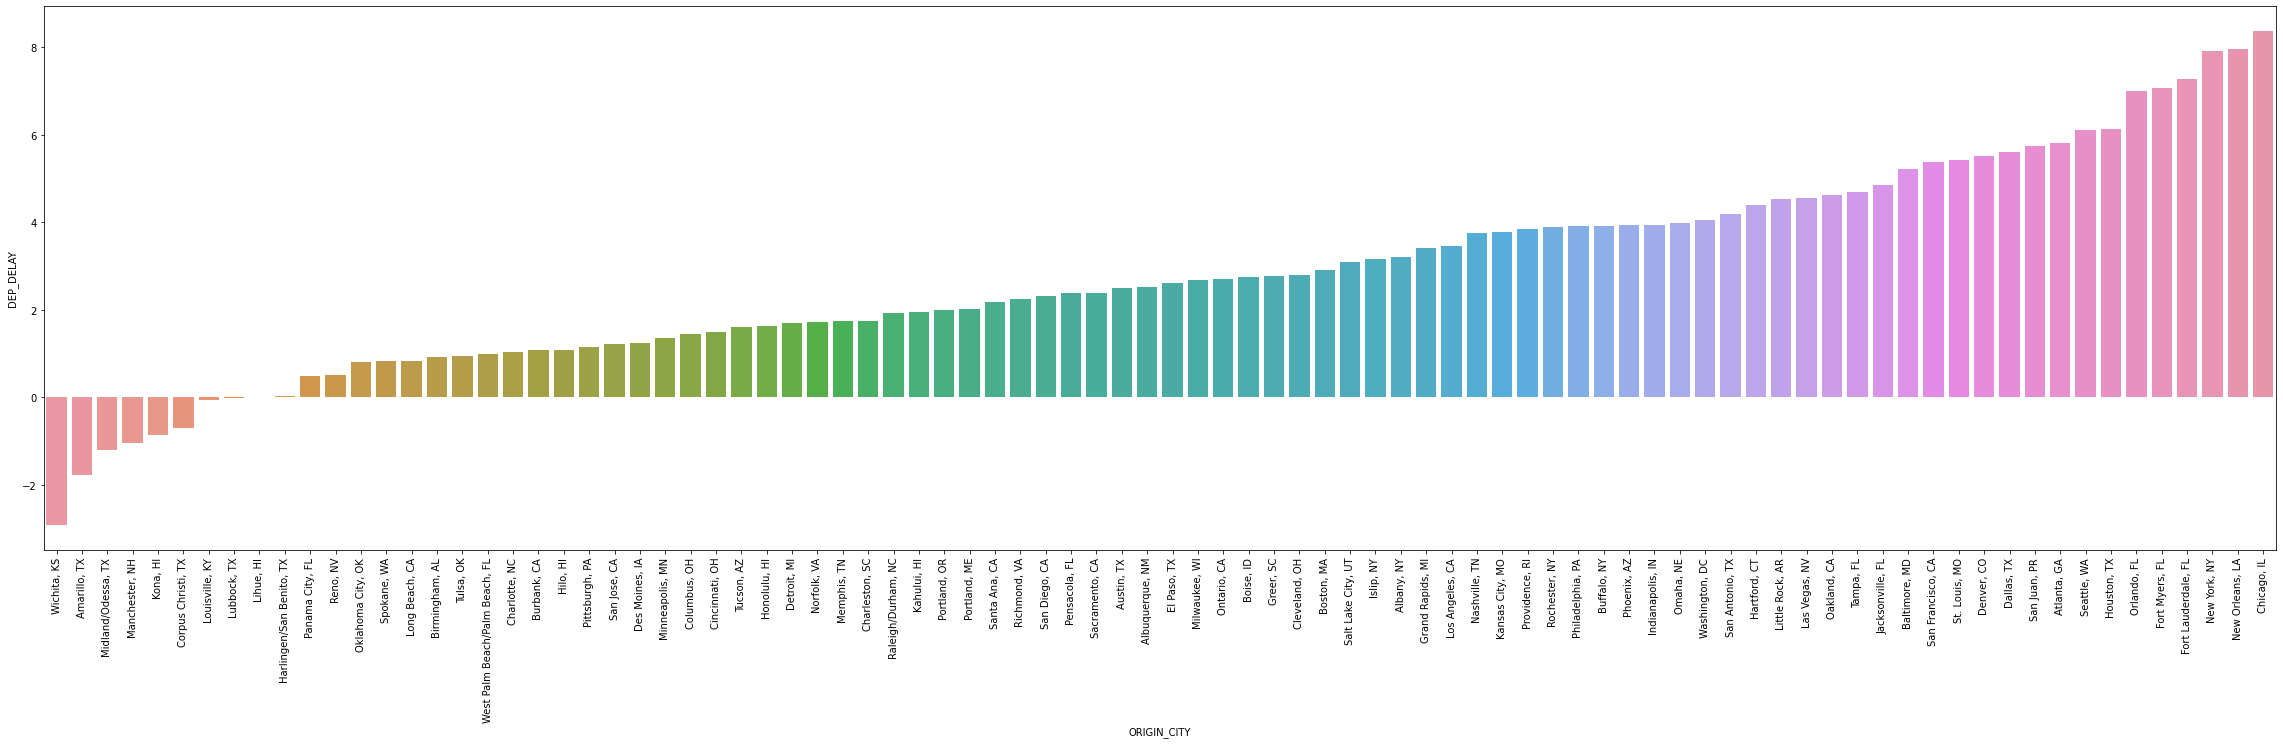

In [65]:
plt.figure(figsize =(40,10))
plt.xticks(rotation = 90)
temp = df[['DEP_DELAY', 'ORIGIN_CITY']] 
temp = pd.DataFrame(temp.groupby('ORIGIN_CITY')['DEP_DELAY'].agg('mean')).reset_index().sort_values(by= ['DEP_DELAY'])
temp
sns.barplot(x='ORIGIN_CITY', y="DEP_DELAY", data = temp)

In [32]:
# Here we can get the same information in a table 
t1=temp
t1

,ORIGIN_CITY,DEP_DELAY
87,"Wichita, KS",-2.923729
2,"Amarillo, TX",-1.783217
47,"Midland/Odessa, TX",-1.205036
45,"Manchester, NH",-1.042802
37,"Kona, HI",-0.872483
...,...,...
24,"Fort Myers, FL",7.084225
23,"Fort Lauderdale, FL",7.290528
52,"New York, NY",7.927954
51,"New Orleans, LA",7.960164


The below figure shows the number of flights time in each day of the week (Air Traffic)

<AxesSubplot:xlabel='WEEK_DAY', ylabel='AIR_TIME'>

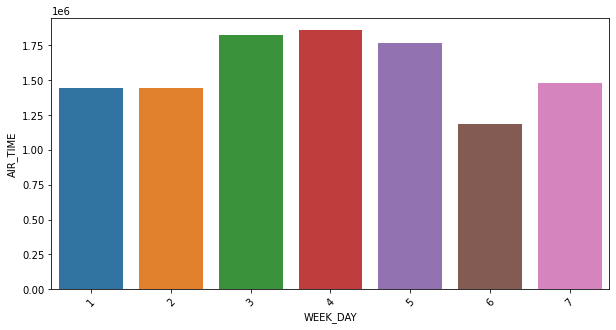

In [60]:
plt.figure(figsize =(10,5))
plt.xticks(rotation = 45)
temp = df[['AIR_TIME', 'WEEK_DAY']] 
temp = pd.DataFrame(temp.groupby('WEEK_DAY')['AIR_TIME'].agg('sum')).reset_index().sort_values(by= ['AIR_TIME'])
temp
sns.barplot(x='WEEK_DAY', y="AIR_TIME", data = temp)

In [49]:
#Wednesday has the highest air traffic during the week
t2=temp
t2

,WEEK_DAY,AIR_TIME
5,6,1182881.0
1,2,1440845.0
0,1,1443243.0
6,7,1478819.0
4,5,1768817.0
2,3,1822548.0
3,4,1855419.0


The rate of difference between the scheduled access time and the actual time

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


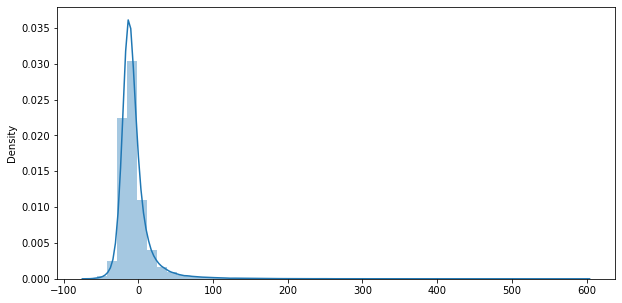

In [61]:
plt.figure(figsize = (10,5))
sns.distplot(x=df['ARR_DELAY']);

The figure below gives us an idea of the relationship between flight delays due to civil aviation and the distance between airports

<AxesSubplot:xlabel='DISTANCE', ylabel='NAS_DELAY'>

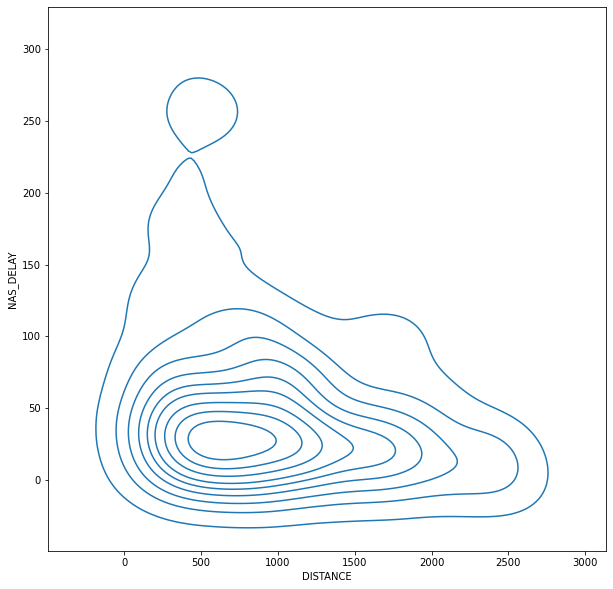

In [66]:
plt.figure(figsize =(10,10))
temp = df[['NAS_DELAY', 'DISTANCE']] 
temp = pd.DataFrame(temp.groupby('DISTANCE')['NAS_DELAY'].agg('max')).reset_index().sort_values(by= ['NAS_DELAY'])
temp
sns.kdeplot(x='DISTANCE', y="NAS_DELAY", data = temp)